In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

## Exercise 1: Empirical p-values

Simulate random data for two groups.

In [2]:
np.random.seed(47404)

## Define parameters: group A.
N_a = 100
mu_a = 1
sd_a = 3

## Define parameters: group B.
N_b = 100
mu_b = 0
sd_b = 3

## Simulate data.
A = np.random.normal(mu_a, sd_a, N_a)
B = np.random.normal(mu_b, sd_b, N_b)

Compute the true t-statistic and p-value.

In [3]:
t_true, p_true = ttest_ind(A, B)
print(t_true, p_true)

2.1584316104281203 0.03209770345245153


Simulate permuted t-statistics.

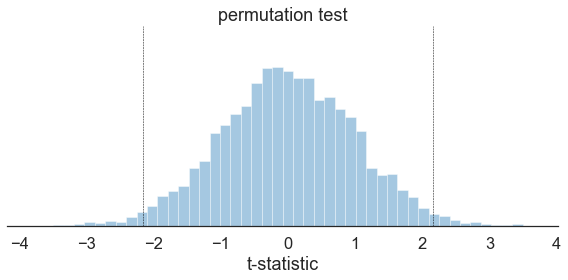

In [4]:
## Define parameters.
n_perm = 5000

## Preallocate space.
t_perm = np.zeros(n_perm)

## Main loop.
obs = np.concatenate([A,B])
for i in range(t_perm.size):
    
    ## Shuffle observations.
    np.random.shuffle(obs)
    
    ## Divide into random groups.
    A_perm = obs[:N_a]
    B_perm = obs[N_b:]
    
    ## Compute and store permuted t-statistic.
    t_perm[i], _ = ttest_ind(A_perm, B_perm)
    
## Plot distribution.
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.distplot(t_perm, kde=False, ax=ax)
ax.vlines([-t_true, t_true], 0, 400, lw=0.5, linestyle='--')
ax.set(xlabel='t-statistic', yticks=[], ylim=(0,400), title='permutation test')

sns.despine(left=True)
plt.tight_layout()

Compute the empirical p-value.

In [5]:
p_perm = (np.abs(t_perm) > t_true).mean()
print('empirical p-value:', p_perm)

empirical p-value: 0.0298


## Exercise 2: p-values as random variables

Simulate the distribution of p-values for a comparison of two (normally distributed) samples.

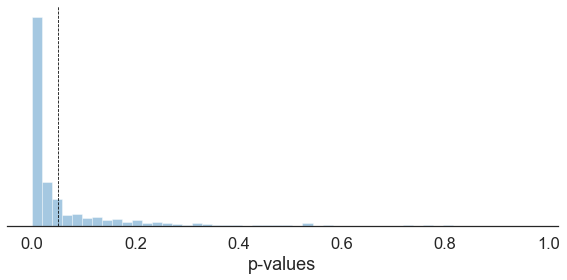

In [6]:
np.random.seed(47404)

## Define parameters.
n_sim = 1000

## Define parameters: group A.
N_a = 100
mu_a = 1
sd_a = 3

## Define parameters: group B.
N_b = 100
mu_b = 0
sd_b = 3

## Preallocate space.
p_values = np.zeros(n_sim)

for i in range(n_sim):

    ## Simulate data.
    A = np.random.normal(mu_a, sd_a, N_a)
    B = np.random.normal(mu_b, sd_b, N_b)
    
    ## Compute and store permuted p-value.
    _, p_values[i] = ttest_ind(A, B)
    
## Plot distribution.
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.distplot(p_values, kde=False, ax=ax)
ax.axvline(0.05, color='k', lw=0.8, linestyle='--')
ax.set(xlabel='p-values', yticks=[])

sns.despine(left=True)
plt.tight_layout()

## Exercise 3: p-values under null hypothesis

Simulate the distribution of p-values under the hypothesis ($\mu_1 = \mu_2$).

0.0564


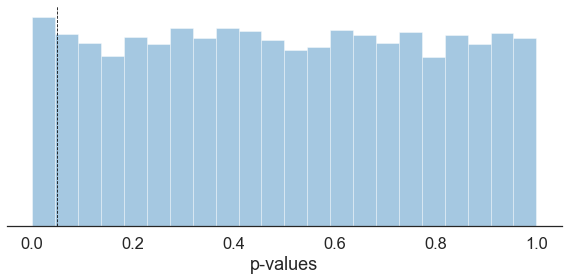

In [7]:
np.random.seed(47404)

## Define parameters.
n_sim = 10000

## Define parameters: group A.
N_a = 100
mu_a = 0
sd_a = 3

## Define parameters: group B.
N_b = 100
mu_b = 0
sd_b = 3

## Preallocate space.
p_values = np.zeros(n_sim)

for i in range(n_sim):

    ## Simulate data.
    A = np.random.normal(mu_a, sd_a, N_a)
    B = np.random.normal(mu_b, sd_b, N_b)
    
    ## Compute and store permuted p-value.
    _, p_values[i] = ttest_ind(A, B)
    
## Compute fraction of significant p-values.
print(np.mean(p_values < 0.05))
    
## Plot distribution.
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.distplot(p_values, kde=False, ax=ax)
ax.axvline(0.05, color='k', lw=0.8, linestyle='--')
ax.set(xlabel='p-values', yticks=[])

sns.despine(left=True)
plt.tight_layout()

## Exercise 4: p-values under alternative hypothesis

Simulate the distribution of p-values under the alternative ($\mu_1 \neq \mu_2$).

0.6567


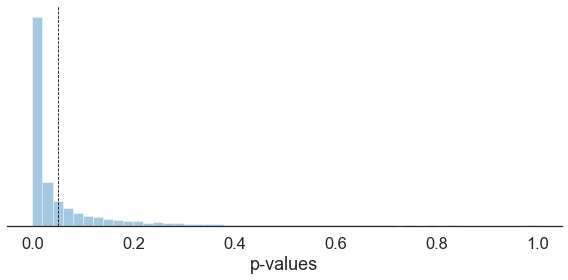

In [8]:
np.random.seed(47404)

## Define parameters.
n_sim = 10000

## Define parameters: group A.
N_a = 100
mu_a = 1
sd_a = 3

## Define parameters: group B.
N_b = 100
mu_b = 0
sd_b = 3

## Preallocate space.
p_values = np.zeros(n_sim)

for i in range(n_sim):

    ## Simulate data.
    A = np.random.normal(mu_a, sd_a, N_a)
    B = np.random.normal(mu_b, sd_b, N_b)
    
    ## Compute and store permuted p-value.
    _, p_values[i] = ttest_ind(A, B)
    
## Compute fraction of significant p-values.
print(np.mean(p_values < 0.05))
    
## Plot distribution.
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.distplot(p_values, kde=False, ax=ax)
ax.set(xlabel='p-values', yticks=[])
ax.axvline(0.05, color='k', lw=0.8, linestyle='--')

sns.despine(left=True)
plt.tight_layout()